# Explore  data  about  customer  satisfied  one of big pizza company which is pizza  hut

## 1. Business problem

Dataset Overview:
The "Pizza Hut Reviews and Ratings: Insights from One of Sri Lanka's Pioneer Branches" dataset comprises a detailed compilation of customer feedback for the Pizza Hut outlet at Union Place, Colombo. This branch stands out as one of the inaugural Pizza Hut locations in Sri Lanka. The dataset is structured to encapsulate a wide array of customer experiences through ratings and textual reviews.

Data Science Applications:
Sentiment Analysis: Extracting and analyzing customer sentiments from textual reviews.
Trend Identification: Identifying patterns and trends in customer feedback over time.
Customer Satisfaction Metrics: Quantifying satisfaction levels based on ratings and review content.
Column Descriptors:
title: Specifies the Pizza Hut location reviewed, here being Union Place, Colombo.
stars: Customer-provided rating on a scale from 1 (lowest) to 5 (highest).
text: Customer's written review, offering deeper insights into their experience.
Ethically Mined Data:
The dataset adheres to strict data privacy standards, including GDPR, ensuring the removal of personal identifiers to maintain reviewer anonymity and privacy.

Acknowledgments:
Gratitude is extended to the platforms enabling this data collection and to Pizza Hut for the use of their logo as the thumbnail image for this dataset. This is purely for illustrative purposes and does not imply any affiliation or endorsement.

## 2. Explore  data 

### 2.1. Input dataa

In [1]:
import pandas as pd
import numpy as np

# link to file excel
path = '/Users/mac/Desktop/Project/pizza_hut/pizza_hut_reviews.csv'

# read file

df = pd.read_csv(path)

# show

df.head()


,title,stars,text
0,Pizza Hut - Union Place,5,NaN
1,Pizza Hut - Union Place,5,NaN
2,Pizza Hut - Union Place,4,NaN
3,Pizza Hut - Union Place,5,NaN
4,Pizza Hut - Union Place,4,NaN


In [2]:
df['text'].unique()

array([nan, 'Good place to visit to have some food',
       'Had a personal pan chicken tandoori, it was quite on point just like the pizza hut one looks forward to. The staff was courteous and had parking space too.',
       ...,
       'Very good outlet. Since this is a restaurant they have a very good range of food and beverages',
       'Our usual family dinner place at least once in a month. Friendly staff',
       'Had to wait about two hours for just a lava cake .'], dtype=object)

In [3]:
df.describe()

,stars
count,4000.000000
mean,4.371500
std,0.985003
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4000 non-null   object
 1   stars   4000 non-null   int64 
 2   text    1308 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


In [5]:
df['title'].unique()

array(['Pizza Hut - Union Place'], dtype=object)

## 3. Clear data

#### 3.1. Clear dữ liệu cột text

In [6]:
## xoá khoảng trông trước và sau trong 1 ô
df['text'] = df['text'].str.strip()
df['text'].head(100)

0                                         NaN
1                                         NaN
2                                         NaN
3                                         NaN
4                                         NaN
                       ...                   
95                                        NaN
96                                        NaN
97    Their melts are superb with kochchi dip
98                         Good experience...
99                                        NaN
Name: text, Length: 100, dtype: object

In [7]:
a = df['text'].value_counts()
print(a)

text
Good                                                                                                                                              38
Good service                                                                                                                                      18
Nice place                                                                                                                                         9
Good place                                                                                                                                         8
Excellent                                                                                                                                          8
                                                                                                                                                  ..
Premium pizza experience                                                                             

In [8]:

df['text'] = df['text'].apply(lambda x: str(x) if isinstance(x, float) else x)
# Tạo một cột mới 'New Column' và gán giá trị mặc định là None
df['checkmore'] = 'non attention'

# Kiểm tra và gán giá trị cho cột mới
df.loc[df['text'].str.split().apply(len) >= 3, 'checkmore'] = 'attention'

print (df['checkmore'])

0       non attention
1       non attention
2       non attention
3       non attention
4       non attention
            ...      
3995    non attention
3996        attention
3997        attention
3998        attention
3999        attention
Name: checkmore, Length: 4000, dtype: object


In [9]:
a = df['checkmore'].value_counts()
print (a)

checkmore
non attention    3006
attention         994
Name: count, dtype: int64


In [10]:
data = df.loc[df['checkmore'] == 'attention']
data.head()

,title,stars,text,checkmore
6,Pizza Hut - Union Place,5,Good place to visit to have some food,attention
7,Pizza Hut - Union Place,5,"Had a personal pan chicken tandoori, it was qu...",attention
12,Pizza Hut - Union Place,5,Very good place to dine in Pizza\nNice and qui...,attention
13,Pizza Hut - Union Place,5,Very good service..clean place...,attention
15,Pizza Hut - Union Place,5,Yes it was very clean beautiful environment. p...,attention


## 4. Trực quan hoá dự liệu

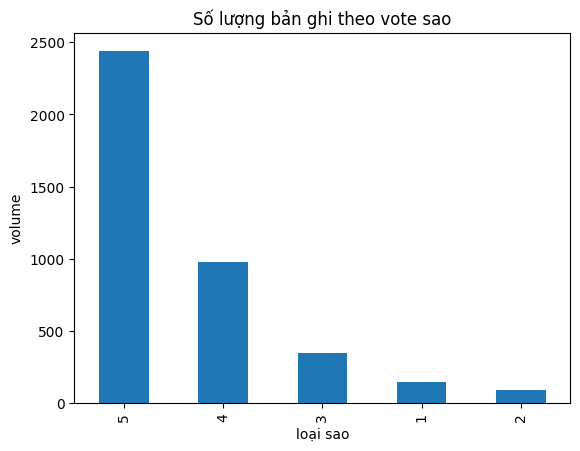

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df['stars'].value_counts().plot(kind='bar')
# Đặt tiêu đề và nhãn trục
plt.title('Số lượng bản ghi theo vote sao')
plt.xlabel('loại sao')
plt.ylabel('volume')

plt.show()

#### Không ngoài dự đoán, pizzahut được khách hàng vote 5 sao nhiều nhất (câo gấp 1,5 lần so với 4 sao). Tuy nhiên vẫn có vote 1,2,3 khá nhiều. Cần tìm nguyên nhân và khắc phục

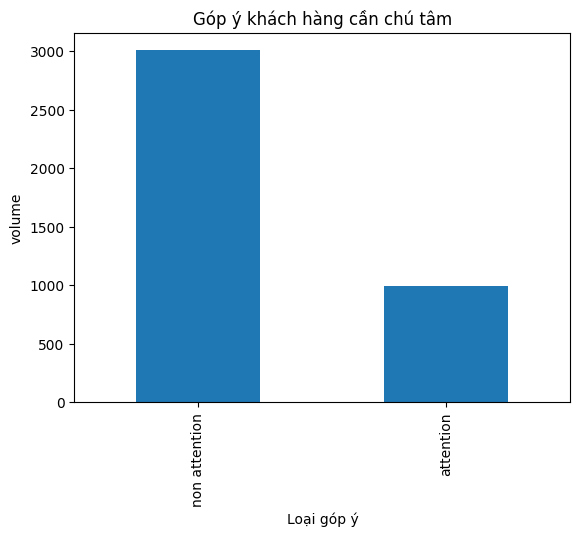

In [12]:
df['checkmore'].value_counts().plot(kind='bar')
# Đặt tiêu đề và nhãn trục
plt.title('Góp ý khách hàng cần chú tâm')
plt.xlabel('Loại góp ý')
plt.ylabel('volume')

plt.show()

#### Cần phải phân tích chiều thông tin khách hàng góp ý để cải thiện chất lượng dịch vụ

In [42]:
data.head(1000)

,title,stars,text,checkmore
6,Pizza Hut - Union Place,5,Good place to visit to have some food,attention
7,Pizza Hut - Union Place,5,"Had a personal pan chicken tandoori, it was qu...",attention
12,Pizza Hut - Union Place,5,Very good place to dine in Pizza\nNice and qui...,attention
13,Pizza Hut - Union Place,5,Very good service..clean place...,attention
15,Pizza Hut - Union Place,5,Yes it was very clean beautiful environment. p...,attention
...,...,...,...,...
3994,Pizza Hut - Union Place,5,Ample parking & friendly staff,attention
3996,Pizza Hut - Union Place,4,Very helpful staff,attention
3997,Pizza Hut - Union Place,5,Very good outlet. Since this is a restaurant t...,attention
3998,Pizza Hut - Union Place,4,Our usual family dinner place at least once in...,attention


In [13]:
a = data['stars'].value_counts()
print(a)

stars
5    532
4    268
3     90
1     69
2     35
Name: count, dtype: int64


In [14]:
data = df.loc[df['stars'] < 4]
data.head()

,title,stars,text,checkmore
21,Pizza Hut - Union Place,1,Ordered a Seafood pasta. It was not delivered ...,attention
25,Pizza Hut - Union Place,3,Typical Pizza Hut but very slow service,attention
38,Pizza Hut - Union Place,3,nan,non attention
43,Pizza Hut - Union Place,3,Normal Pizza Hut,attention
53,Pizza Hut - Union Place,3,nan,non attention


In [15]:

data = data.loc[data['checkmore'] == 'attention']
data.shape

(194, 4)

In [20]:
data.head(100)

,title,stars,text,checkmore
21,Pizza Hut - Union Place,1,Ordered a Seafood pasta. It was not delivered ...,attention
25,Pizza Hut - Union Place,3,Typical Pizza Hut but very slow service,attention
43,Pizza Hut - Union Place,3,Normal Pizza Hut,attention
56,Pizza Hut - Union Place,1,Our overall experience was very bad. We had to...,attention
63,Pizza Hut - Union Place,1,Poor customer service,attention
...,...,...,...,...
1363,Pizza Hut - Union Place,3,Garlic bread was not up to the mark. Rest othe...,attention
1370,Pizza Hut - Union Place,1,Thought I’d try the thin crust pizza here. Bad...,attention
1398,Pizza Hut - Union Place,3,One of the largest outlets in the Colombo city.,attention
1400,Pizza Hut - Union Place,2,"Furchtbar, hier sollte Pizza Hut einfach mal K...",attention


In [21]:
a  = data['text'].value_counts()
print(a)

text
Poor customer service                                                                                                                                                                                                                                                                                                                                                                                                                2
Ordered a Seafood pasta. It was not delivered with rest of food. Had to go to billing desk to say that pasta is not delivered. After about 7 minutes, waitress who served us informed the Pasta plate cracked in the oven due to heat  and a new dish was being made. Waitress should have informed us since the Kitchen is not miles away. Pathetic service by Pizza Hut. Hope management of John Keells should take a note too.    1
services not good                                                                                                                                    

### 5. Kết  Luận  và đề  xuất  giải  pháp

Dựa  vào  số  liệu  hiển  thị, có  thể  thấy rằng, cần chú ý đến 194 góp ý từ khách hàng để nâng cao chất lượng dịch vụ. Khách hàng phàn nàn về việc phục vụ chậm, order sai, không hợp khẩu vị khách hàng và đặc biết là cách xử lý của nhân viên khá chậm.